In [1]:
import pickle
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from Utility import lorenz_curve,gini,h2m_ratio,wealth_share

pd.options.display.float_format = "{:,.2f}".format

In [2]:
## 
slides = True

In [49]:
## figure plotting configurations


plt.style.use('seaborn')
plt.rcParams["font.family"] = "Times New Roman" #'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['axes.labelweight'] = 'bold'


if slides == False:
    ## Set the 
    plt.rc('font', size=25)
    # Set the axes title font size
    plt.rc('axes', titlesize=20)
    # Set the axes labels font size
    plt.rc('axes', labelsize=20)
    # Set the font size for x tick labels
    plt.rc('xtick', labelsize=20)
    # Set the font size for y tick labels
    plt.rc('ytick', labelsize=20)
    # Set the legend font size
    plt.rc('legend', fontsize=20)
    # Set the font size of the figure title
    plt.rc('figure', titlesize=20)
    ## set the lwidth 
    plt.rc('lines', linewidth=3)


else:
    ## Set the 
    plt.rc('font', size=30)
    # Set the axes title font size
    plt.rc('axes', titlesize=30)
    # Set the axes labels font size
    plt.rc('axes', labelsize=30)
    # Set the font size for x tick labels
    plt.rc('xtick', labelsize=30)
    # Set the font size for y tick labels
    plt.rc('ytick', labelsize=30)
    # Set the legend font size
    plt.rc('legend', fontsize=30)
    # Set the font size of the figure title
    plt.rc('figure', titlesize=40)
    ## set the lwidth 
    plt.rc('lines', linewidth=4)

In [50]:
## parameters needed for plot

T = 40

h2m_cut_off = round(1/24,2)

In [51]:
## get the wealth distribution from SCF (net worth)

SCF2016 = pd.read_stata('rscfp2016.dta')

## some filters of the data 
SCF2016 = SCF2016.drop_duplicates(subset=['yy1'])
SCF2016 = SCF2016[(SCF2016['age']>=25) & (SCF2016['age']<=85)]
SCF2016 = SCF2016[SCF2016['income']>0]
SCF2016 = SCF2016[SCF2016['norminc']>0]

## redefine networth 
SCF2016 = SCF2016[SCF2016['networth']<SCF2016['networth'].quantile(0.95)]
#SCF2016 = SCF2016[SCF2016['networth']>=0]

## liquid net wealth
#SCF2016['lqwealth'] = SCF2016['liq']+SCF2016['govtbnd']- SCF2016['ccbal']
SCF2016['lqwealth'] = SCF2016['liq']+SCF2016['govtbnd']+SCF2016['nmmf']-SCF2016['stmutf']-SCF2016['obmutf'] - SCF2016['ccbal'] 
#SCF2016['lqwealth'] = SCF2016['liq']+SCF2016['govtbnd']+SCF2016['nmmf'] - SCF2016['ccbal'] 

## exclude negative liquid wealth and top 5% net wealth
SCF2016 = SCF2016[SCF2016['lqwealth']>=0]

## wealth 2 income ratio 
SCF2016['w2income'] = SCF2016['networth']/ SCF2016['norminc']
## liquid wealth 2 income ratio
SCF2016['lw2income'] = SCF2016['lqwealth']/ SCF2016['norminc']

## get all arrays 

SCF_inc, SCF_inc_weights = np.array(SCF2016['norminc']), np.array(SCF2016['wgt'])

SCF_wealth, SCF_weights = np.array(SCF2016['networth']), np.array(SCF2016['wgt'])
SCF_w2inc, SCF_w2incweights = np.array(SCF2016['w2income']), np.array(SCF2016['wgt'])

SCF_lqwealth, SCF_lqweights = np.array(SCF2016['lqwealth']), np.array(SCF2016['wgt'])
SCF_lqw2inc, SCF_lqw2incweights = np.array(SCF2016['lw2income']), np.array(SCF2016['wgt'])

## get the lorenz curve weights from SCF 

SCF_inc_sort_id = SCF_inc.argsort()
SCF_inc_sort = SCF_inc[SCF_inc_sort_id]
SCF_inc_weights_sort = SCF_inc_weights[SCF_inc_sort_id]
SCF_inc_weights_sort_norm = SCF_inc_weights_sort/SCF_inc_weights_sort.sum()

SCF_wealth_sort_id = SCF_wealth.argsort()
SCF_wealth_sort = SCF_wealth[SCF_wealth_sort_id]
SCF_weights_sort = SCF_weights[SCF_wealth_sort_id]
SCF_weights_sort_norm = SCF_weights_sort/SCF_weights_sort.sum()

SCF_share_agents_ap, SCF_share_ap = lorenz_curve(SCF_wealth_sort,
                                                 SCF_weights_sort_norm,
                                                 nb_share_grid = 200)

## get the lorenz curve weights of liquid wealth from SCF 
SCF_lqwealth_sort_id = SCF_lqwealth.argsort()
SCF_lqwealth_sort = SCF_lqwealth[SCF_lqwealth_sort_id]
SCF_lqweights_sort = SCF_lqweights[SCF_lqwealth_sort_id]
SCF_lqweights_sort_norm = SCF_lqweights_sort/SCF_lqweights_sort.sum()

SCF_lq_share_agents_ap, SCF_lq_share_ap = lorenz_curve(SCF_lqwealth_sort,
                                                 SCF_lqweights_sort_norm,
                                                 nb_share_grid = 200)

## get the weights of wealth to income ratio from SCF

SCF_w2inc_sort_id = SCF_w2inc.argsort()
SCF_w2inc_sort = SCF_w2inc[SCF_w2inc_sort_id]
SCF_w2incweights_sort = SCF_w2incweights[SCF_w2inc_sort_id]
SCF_w2incweights_sort_norm = SCF_w2incweights_sort/SCF_w2incweights_sort.sum()


## get the weights of liquid wealth to income ratio from SCF

SCF_lqw2inc_sort_id = SCF_lqw2inc.argsort()
SCF_lqw2inc_sort = SCF_lqw2inc[SCF_lqw2inc_sort_id]
SCF_lqw2incweights_sort = SCF_lqw2incweights[SCF_lqw2inc_sort_id]
SCF_lqw2incweights_sort_norm = SCF_lqw2incweights_sort/SCF_lqw2incweights_sort.sum()

## gini 

gini_SCF = gini(SCF_share_agents_ap,
                 SCF_share_ap)

gini_lq_SCF = gini(SCF_lq_share_agents_ap,
                 SCF_lq_share_ap)


## age profile 

SCF_profile = pd.read_pickle('data/SCF_age_profile.pkl')

SCF_profile['mv_wealth'] = SCF_profile['av_wealth'].rolling(3).mean()
SCF_profile['mv_lqwealth'] = SCF_profile['av_lqwealth'].rolling(3).mean()


In [52]:
##h2m ratio
h2m_lq_share_SCF = h2m_ratio(SCF_lqw2inc_sort,
                          SCF_lqw2incweights_sort_norm,
                          h2m_cut_off)

print('H2M ratio liquid asset in SCF is:',(h2m_lq_share_SCF))


h2m_share_SCF = h2m_ratio(SCF_w2inc_sort,
                          SCF_w2incweights_sort_norm,
                          h2m_cut_off)

print('H2M ratio networth in SCF is:',(h2m_share_SCF))

## wealth shares

top_shares = [0.05,0.1,0.5]

for top_share in top_shares:
    wealth_share_this = wealth_share(SCF_lqwealth_sort,
                         SCF_lqweights_sort_norm,
                         top_agents_share=top_share)
    print('Wealth share of top {} of households in SCF'.format(top_share),str(wealth_share_this))
    
## income/wealth 
inc_av = np.dot(SCF_inc_sort,
               SCF_inc_weights_sort_norm)

print('Average permanent income in SCF is $', str(inc_av))

w_av = np.dot(SCF_wealth_sort,
              SCF_weights_sort_norm)

print('Average net worth in SCF is $', str(w_av))

w2inc_av0 = w_av/inc_av
print('Ratio of average net worth to average permanent income in SCF is ', str(w2inc_av0))


lqw_av = np.dot(SCF_lqwealth_sort,
                SCF_lqweights_sort_norm)

print('Average liquid wealth in SCF is $', str(lqw_av))

lqw2inc_av0 = lqw_av/inc_av
print('Ratio of average liquid wealth to average permanent income in SCF is ', str(lqw2inc_av0))


lqw2inc_av = np.dot(SCF_w2inc_sort,
                    SCF_w2incweights_sort_norm)

print('Average networth to permanent income ratio in SCF is ', str(lqw2inc_av))


lqw2inc_av = np.dot(SCF_lqw2inc_sort,
                    SCF_lqw2incweights_sort_norm)

print('Average net liquid wealth to permanent income ratio in SCF is ', str(lqw2inc_av))


H2M ratio liquid asset in SCF is: 0.34077965351625195
H2M ratio networth in SCF is: 0.12329208885897022
Wealth share of top 0.05 of households in SCF 0.7167797256327425
Wealth share of top 0.1 of households in SCF 0.8230970423764169
Wealth share of top 0.5 of households in SCF 0.9894174270092244
Average permanent income in SCF is $ 111503.4064448813
Average net worth in SCF is $ 749726.2346895462
Ratio of average net worth to average permanent income in SCF is  6.723796685621018
Average liquid wealth in SCF is $ 74289.15541938049
Ratio of average liquid wealth to average permanent income in SCF is  0.6662500975349424
Average networth to permanent income ratio in SCF is  4.974066232695962
Average net liquid wealth to permanent income ratio in SCF is  0.4711298756714241


In [74]:
model_names =['baseline',
             #'SLPR',
             'LPR',
             #'HG',
             #'SDPR',
             #'SSDPR',
             #'HPR',
             'HPRUR',
             #'SHPRUR',
              #'HPRG',
             'HPRURG',
             #'HPRURTP',
             #'HPRURGTP',
             #'SHPR',
             #'HTP'
             ]
#
figure_name = '_compare'

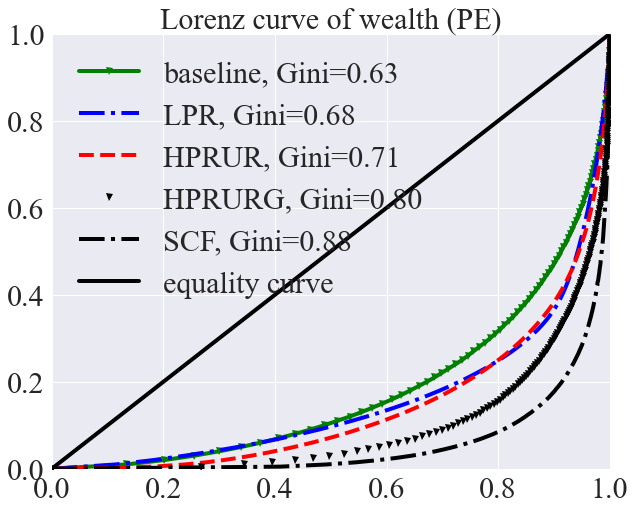

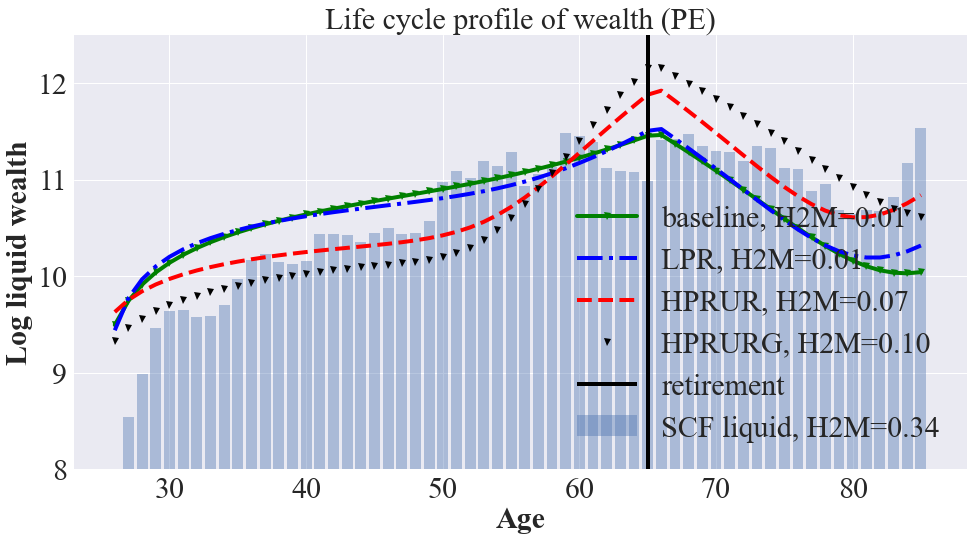

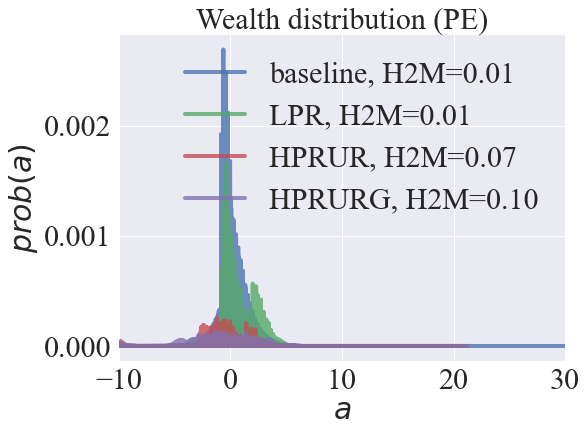

In [75]:
## plot results from different models

########
## PE ##
########

line_patterns =['g-v',
                'b-.',
                'r--',
                'kv',
                'm',
                'c-.'
                ]

## Lorenz curve of steady state wealth distribution

fig, ax = plt.subplots(figsize=(10,8))
for k,model_name in enumerate(model_names):
    model_solution = pickle.load(open('./model_solutions/'+ model_name+'_PE.pkl','rb'))
    ax.plot(model_solution['share_agents_ap'],
            model_solution['share_ap'],
            line_patterns[k],
            label = model_name+', Gini={:.2f}'.format(model_solution['gini']))
ax.plot(SCF_lq_share_agents_ap,
        SCF_lq_share_ap, 'k-.',
        label='SCF, Gini={:.2f}'.format(gini_lq_SCF))
ax.plot(model_solution['share_agents_ap'],
        model_solution['share_agents_ap'], 
        'k-',
        label='equality curve')
ax.set_title('Lorenz curve of wealth (PE)')
ax.legend(loc=0)
plt.xlim([0,1])
plt.ylim([0,1])
plt.savefig('../Graphs/model/lorenz_a_compare_pe'+figure_name+'.pdf')


## life cycle

age_lc = SCF_profile.index

fig, ax = plt.subplots(figsize=(16,8))
plt.title('Life cycle profile of wealth (PE)')

for k,model_name in enumerate(model_names):
    model_solution = pickle.load(open('./model_solutions/'+ model_name+'_PE.pkl','rb'))
    
    ## h2m share 
    h2m_share = h2m_ratio(model_solution['a_grid_dist'],
                          model_solution['a_pdfs_dist'],
                          h2m_cut_off)
    scale_adjust = np.mean(np.log(np.array(SCF_profile['mv_lqwealth'][2:])))-np.mean(np.log(model_solution['A_life']))
    ## scale adjust computed by the initial difference in size of model and data 
    ax.plot(age_lc[1:],
           np.log(model_solution['A_life'])+scale_adjust,
           line_patterns[k],
           label= model_name+', H2M={:.2f}'.format(h2m_share))
ax.set_ylim([8,12.5])

ax.vlines(T+25,
          8,
          12.5,
          color='k',
          label='retirement'
         )
ax.bar(age_lc,
        np.log(SCF_profile['mv_lqwealth']),
          alpha = 0.4,
       label='SCF liquid, H2M={:.2f}'.format(h2m_lq_share_SCF))
ax.set_xlabel('Age')
ax.set_ylabel('Log liquid wealth')
ax.legend(loc=0)
fig.savefig('../Graphs/model/life_cycle_a_compare_pe'+figure_name+'.pdf')


## wealth distributions in pe

fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Wealth distribution (PE)')
for k, model_name in enumerate(model_names):
    model_solution = pickle.load(open('./model_solutions/'+ model_name+'_PE.pkl','rb'))
    
    ## get h2m fraction: an arbitrary definition for now. a2p ratio smaller than 5 
    h2m_share = h2m_ratio(model_solution['a_grid_dist'],
                          model_solution['a_pdfs_dist'],
                          h2m_cut_off)
    ax.plot(np.log(model_solution['ap_grid_dist']+1e-5),
            model_solution['ap_pdfs_dist'],
            label=model_name+', H2M={:.2f}'.format(h2m_share),
           alpha = 0.8)
ax.set_xlabel(r'$a$')
ax.legend(loc=0)
ax.set_xlim([-10,30])

ax.set_ylabel(r'$prob(a)$')

fig.savefig('../Graphs/model/distribution_a_compare_pe'+figure_name+'.pdf')


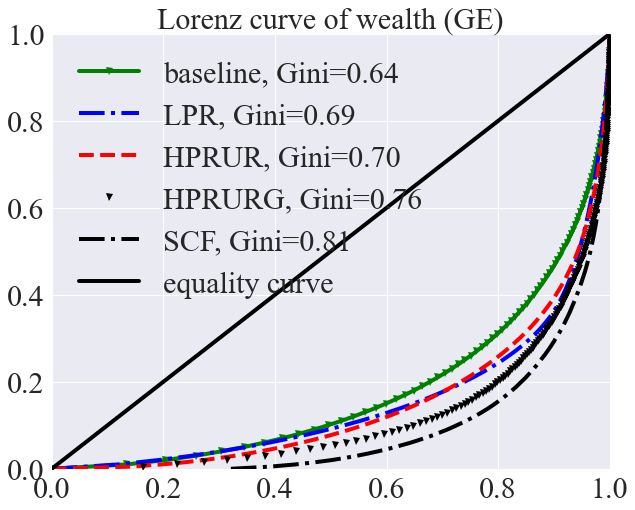

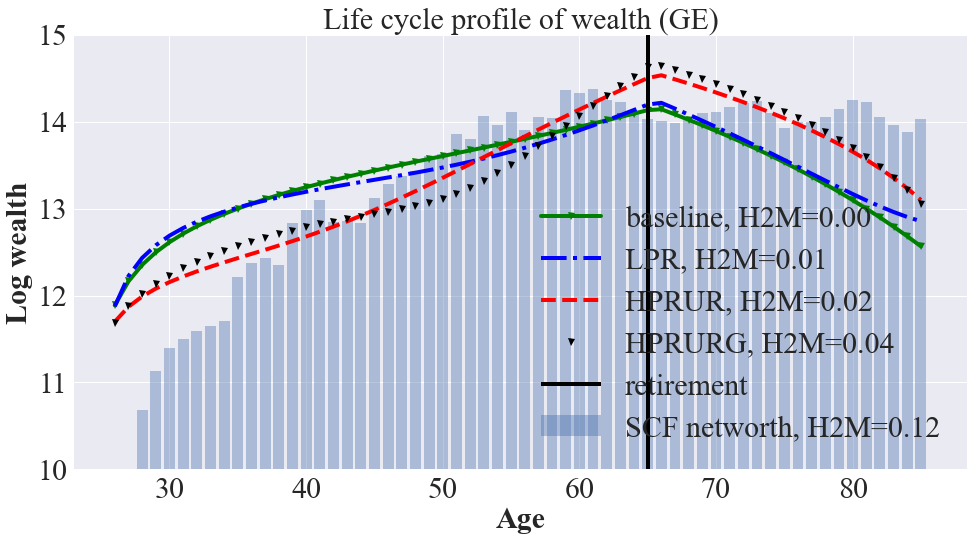

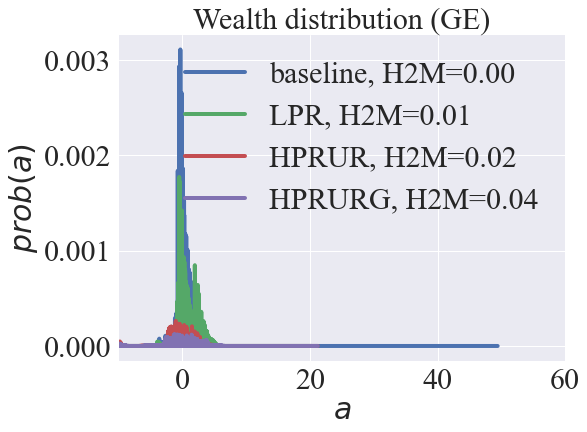

In [76]:
########
## GE ##
########

## lorenz curve in ge

fig, ax = plt.subplots(figsize=(10,8))
for k,model_name in enumerate(model_names):
    model_solution = pickle.load(open('./model_solutions/'+ model_name+'_GE.pkl','rb'))
    ax.plot(model_solution['share_agents_ap'],
            model_solution['share_ap'],
            line_patterns[k],
            label = model_name+', Gini={:.2f}'.format(model_solution['gini']))

ax.plot(SCF_share_agents_ap,
        SCF_share_ap, 'k-.',
        label='SCF, Gini={:.2f}'.format(gini_SCF))
ax.plot(model_solution['share_agents_ap'],
        model_solution['share_agents_ap'], 
        'k-',
        label='equality curve')
ax.set_title('Lorenz curve of wealth (GE)')
ax.legend(loc=0)
plt.xlim([0,1])
plt.ylim([0,1])
fig.savefig('../Graphs/model/lorenz_a_compare_ge'+figure_name+'.pdf')


## life cycle profile in ge

fig, ax = plt.subplots(figsize=(16,8))

plt.title('Life cycle profile of wealth (GE)')

for k, model_name in enumerate(model_names):
    model_solution = pickle.load(open('./model_solutions/'+ model_name+'_GE.pkl','rb'))
    ## h2m share 
    h2m_share = h2m_ratio(model_solution['a_grid_dist'],
                          model_solution['a_pdfs_dist'],
                          h2m_cut_off)
    scale_adjust = np.mean(np.log(np.array(SCF_profile['mv_wealth'])[2:]))-np.mean(np.log(model_solution['A_life']))
    ax.plot(age_lc[1:],
            np.log(model_solution['A_life'])+scale_adjust,
            line_patterns[k],
           label = model_name+', H2M={:.2f}'.format(h2m_share))
ax.set_ylim([10,15])
ax.vlines(T+25,
          10,
          15,
          color='k',
          label='retirement')
ax.bar(age_lc,
        np.log(SCF_profile['mv_wealth']),
       #'k--',
        alpha = 0.4,
       label='SCF networth, H2M={:.2f}'.format(h2m_share_SCF))

ax.set_xlabel('Age')
ax.set_ylabel('Log wealth')
ax.legend(loc=0)
fig.savefig('../Graphs/model/life_cycle_a_compare_ge'+figure_name+'.pdf')


## wealth distributions in ge

fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Wealth distribution (GE)')
for k, model_name in enumerate(model_names):
    model_solution = pickle.load(open('./model_solutions/'+ model_name+'_GE.pkl','rb'))
    ## get h2m fraction: an arbitrary definition for now. a2p ratio smaller than 5 
    h2m_share = h2m_ratio(model_solution['a_grid_dist'],
                          model_solution['a_pdfs_dist'],
                          h2m_cut_off)
    ax.plot(np.log(model_solution['ap_grid_dist']+1e-5),
            model_solution['ap_pdfs_dist'],
            label= model_name+', H2M={:.2f}'.format(h2m_share))
ax.set_xlabel(r'$a$')
ax.legend(loc=0)
ax.set_ylabel(r'$prob(a)$')
ax.set_xlim([-10,60])

fig.savefig('../Graphs/model/distribution_a_compare_ge'+figure_name+'.pdf')

In [23]:
## tablulate some results 

model_dicts = []

## SCF 

SCF_liq_dict = {}
SCF_liq_dict['Model/Data'] = 'SCF (liquid)'
SCF_liq_dict['Gini'] = gini_lq_SCF

for top_share in top_shares:
    wealth_share_this = wealth_share(SCF_lqwealth_sort,
                                     SCF_lqweights_sort_norm,
                                     top_agents_share=top_share)
    SCF_liq_dict['Top {}'.format(top_share)] = wealth_share_this
SCF_liq_h2m_share = h2m_ratio(SCF_lqw2inc_sort,
                      SCF_lqw2incweights_sort_norm,
                      h2m_cut_off)

SCF_liq_dict['Mean wealth/income ratio'] = lqw2inc_av0

SCF_liq_dict['H2M share'] = SCF_liq_h2m_share
model_dicts.append(SCF_liq_dict)

## PE model results 

for k,model_name in enumerate(model_names):
    ## PE 
    model_pe_solution = pickle.load(open('./model_solutions/'+ model_name+'_PE.pkl','rb'))
    this_model_pe_dict = {}
    this_model_pe_dict['Model/Data'] = model_name+' (PE)'
    this_model_pe_dict['Gini'] = model_pe_solution['gini']
    h2m_share = h2m_ratio(model_pe_solution['a_grid_dist'],
                          model_pe_solution['a_pdfs_dist'],
                          h2m_cut_off)
    
    ## get wealth shares 
    for top_share in top_shares:
        wealth_share_this = wealth_share(model_pe_solution['ap_grid_dist'],
                                     model_pe_solution['ap_pdfs_dist'],
                                     top_agents_share = top_share)
        this_model_pe_dict['Top {}'.format(top_share)] = wealth_share_this
    
        w2inc_ratio_av = np.dot(model_pe_solution['a_grid_dist'],
                               model_pe_solution['a_pdfs_dist'])
        this_model_pe_dict['Mean wealth/income ratio'] = model_pe_solution['A_norm']
        
    this_model_pe_dict['H2M share'] = h2m_share
    model_dicts.append(this_model_pe_dict)
    
    
## GE 

SCF_dict = {}
SCF_dict['Model/Data'] = 'SCF (net worth)'
SCF_dict['Gini'] = gini_SCF

for top_share in top_shares:
    wealth_share_this = wealth_share(SCF_wealth_sort,
                                     SCF_weights_sort_norm,
                                     top_agents_share=top_share)
    SCF_dict['Top {}'.format(top_share)] = wealth_share_this
SCF_h2m_share = h2m_ratio(SCF_w2inc_sort,
                      SCF_w2incweights_sort_norm,
                      h2m_cut_off)

SCF_dict['Mean wealth/income ratio'] = w2inc_av0
SCF_dict['H2M share'] = SCF_h2m_share
model_dicts.append(SCF_dict)


## GE
for k,model_name in enumerate(model_names):
    model_ge_solution = pickle.load(open('./model_solutions/'+ model_name+'_GE.pkl','rb'))
    ## GE
    this_model_ge_dict = {}
    this_model_ge_dict['Model/Data'] = model_name+' (GE)'
    this_model_ge_dict['Gini'] = model_ge_solution['gini']
    h2m_share = h2m_ratio(model_ge_solution['a_grid_dist'],
                          model_ge_solution['a_pdfs_dist'],
                          h2m_cut_off)
    ## get wealth shares 
    for top_share in top_shares:
        wealth_share_this = wealth_share(model_ge_solution['ap_grid_dist'],
                                     model_ge_solution['ap_pdfs_dist'],
                                     top_agents_share = top_share)
        
        this_model_ge_dict['Top {}'.format(top_share)] = wealth_share_this
        
        w2inc_ratio_av = np.dot(model_ge_solution['a_grid_dist'],
                               model_ge_solution['a_pdfs_dist'])
        this_model_ge_dict['Mean wealth/income ratio'] = model_ge_solution['A_norm']

    this_model_ge_dict['H2M share'] = h2m_share
    model_dicts.append(this_model_ge_dict)
    
results_table = pd.DataFrame(model_dicts)


In [24]:
results_table

,Model/Data,Gini,Top 0.05,Top 0.1,Top 0.5,Mean wealth/income ratio,H2M share
0,SCF (liquid),0.88,0.72,0.82,0.99,0.67,0.34
1,baseline (PE),0.63,0.40,0.53,0.89,1.17,0.01
2,HPR (PE),0.64,0.43,0.57,0.89,0.84,0.01
3,HPRUR (PE),0.71,0.48,0.62,0.93,0.51,0.07
4,HPRURG (PE),0.80,0.56,0.70,0.97,0.63,0.10
5,HPRURGTP (PE),0.77,0.53,0.67,0.96,0.88,0.10
6,SCF (net worth),0.81,0.57,0.71,0.98,6.72,0.12
7,baseline (GE),0.64,0.40,0.53,0.90,1.65,0.00
8,HPR (GE),0.65,0.43,0.57,0.89,1.23,0.01
9,HPRUR (GE),0.70,0.47,0.61,0.92,1.12,0.02


In [25]:
with open('../Tables/model/model_compare_summary.tex', 'w') as tf:
     tf.write(results_table.to_latex(index=False))

/var/folders/39/ks6jc__9375c2fl7h7pwq5jh0000gn/T/ipykernel_17459/365310925.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(results_table.to_latex(index=False))
